In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")


In [2]:
df = pd.read_csv("/kaggle/input/datasets/joebeachcapital/linkedin-jobs/final_data.csv", encoding="latin1")

df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/datasets/joebeachcapital/linkedin-jobs/final_data.csv'

In [ ]:
numeric_cols = [
    "Total_applicants",
    "LinkedIn_Followers",
    "Employee_count" ]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna(subset=numeric_cols)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Company_Name        811 non-null    object
 1   Class               811 non-null    object
 2   Designation         811 non-null    object
 3   Location            811 non-null    object
 4   Total_applicants    811 non-null    int64 
 5   LinkedIn_Followers  811 non-null    int64 
 6   Level               811 non-null    object
 7   Involvement         811 non-null    object
 8   Employee_count      811 non-null    int64 
 9   Industry            811 non-null    object
 10  PYTHON              811 non-null    int64 
 11  C++                 811 non-null    int64 
 12  JAVA                811 non-null    int64 
 13  HADOOP              811 non-null    int64 
 14  SCALA               811 non-null    int64 
 15  FLASK               811 non-null    int64 
 16  PANDAS              811 no

# 1. Average Applicants by Industry

In [ ]:
industry_applicants = (
    df.groupby("Industry")["Total_applicants"]
      .mean()
      .sort_values(ascending=False)
)

industry_applicants.head(10)


Industry
Telecommunications                      77.333333
Technology, Information and Internet    36.000000
IT Services and IT Consulting           25.424542
Real Estate                              6.948454
Name: Total_applicants, dtype: float64

# 2. Visualize Industry Performance

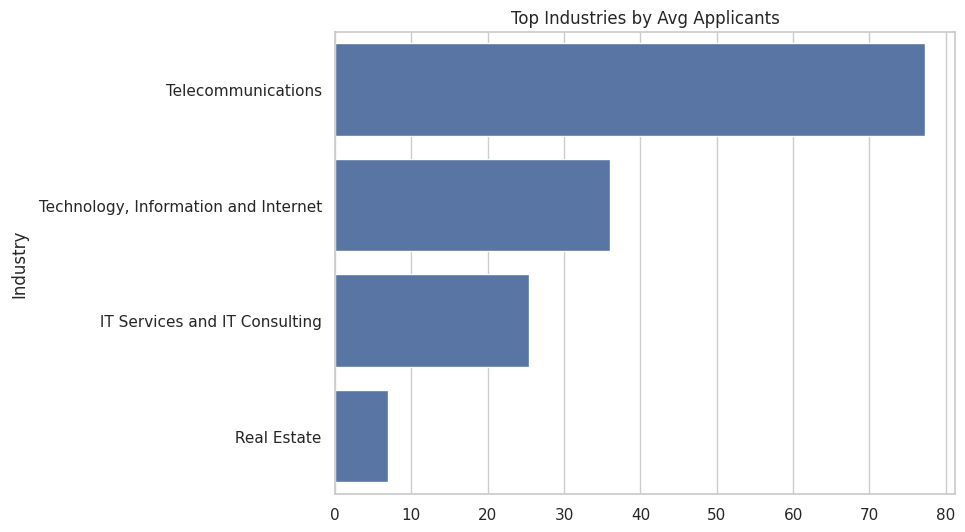

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(
    x=industry_applicants.head(10).values,
    y=industry_applicants.head(10).index
)

plt.title("Top Industries by Avg Applicants")
plt.show()


# 3. Applicants by Job Level

In [ ]:
level_stats = (
    df.groupby("Level")["Total_applicants"]
      .mean()
      .sort_values(ascending=False)
)

level_stats


Level
Contract      26.941176
Full-time     23.357683
Name: Total_applicants, dtype: float64

# 4. Visualize Job Level Impact

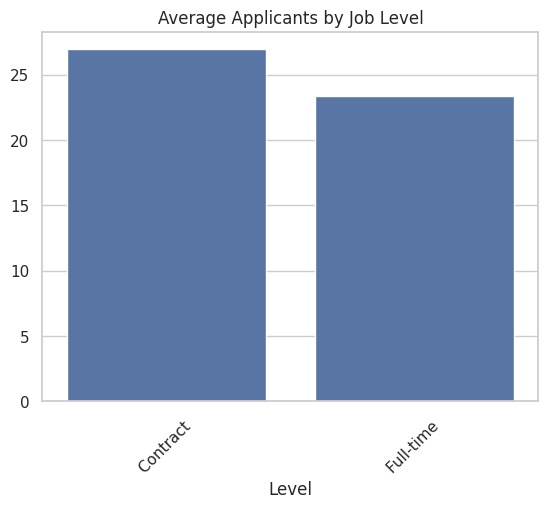

In [ ]:
sns.barplot(x=level_stats.index,
            y=level_stats.values)

plt.xticks(rotation=45)
plt.title("Average Applicants by Job Level")
plt.show()


# 5. Which Skills Attract More Applicants?

In [ ]:
skill_effect = {}

skill_cols = [
    "REACTJS","AI","UI","TABLEAU",
    "NODEJS","EXCEL","POWER BI",
    "SELENIUM","HTML","ML"
]

for skill in skill_cols:
    skill_effect[skill] = df[df[skill] == 1]["Total_applicants"].mean()

skill_effect_df = pd.Series(skill_effect).sort_values(ascending=False)
skill_effect_df


SELENIUM    34.272727
HTML        29.388889
ML          27.945946
UI          26.217262
EXCEL       25.508475
AI          24.909091
NODEJS      24.538462
REACTJS     21.300000
TABLEAU     20.266667
POWER BI    10.333333
dtype: float64

# 6. Visualize Skill Impact

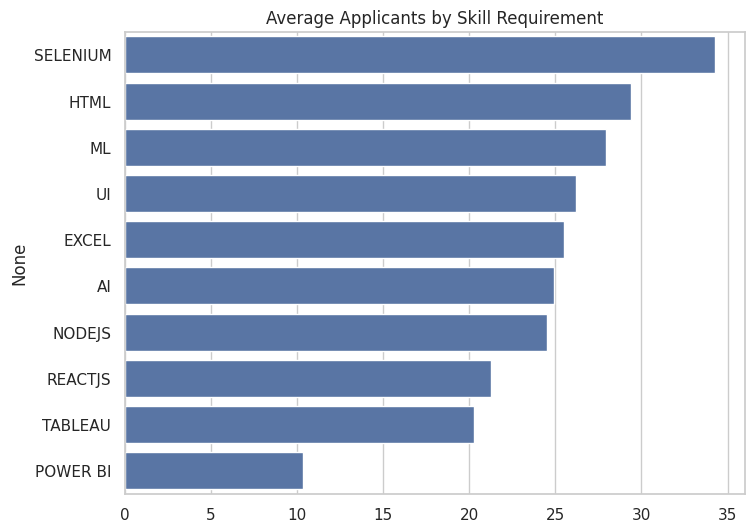

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(
    x=skill_effect_df.values,
    y=skill_effect_df.index
)

plt.title("Average Applicants by Skill Requirement")
plt.show()
